# -*- coding: utf-8 -*-
"""
Created on Mon Jul  6 16:00:55 2020

@author: haolinl
"""

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io # For extracting data from .mat file
import seaborn

In [2]:
# INPUT PARAM.
result_folder_dir = "head_and_neck" # One of "head_and_neck", "kidney", and "aorta".
RR_result_MAT_filename = 'RR_benchmark_result_alpha_0.01.mat' # "head_and_neck": 0.001; "kidney": 1e-05; "aorta": 0.01.
ANN_result_MAT_filename = "ANN_benchmark_results.mat"
figure_folder_path = os.path.join(result_folder_dir, 'figure') # The folder for plots & figures. 

# PLOT PARAM. 
violin_bw = 0.15 # Violin plot bandwidth. Default: 0.25. 

In [3]:
# DATA LOADING & PROCESSING. 
if not os.path.isdir(figure_folder_path): os.mkdir(figure_folder_path)

RR_data_mat = scipy.io.loadmat(os.path.join(result_folder_dir, RR_result_MAT_filename))
# General data. 
FM_indices = list(np.array(RR_data_mat['FM_indices']).reshape(-1,1) - 1)
alpha = RR_data_mat['RR_alpha']
RR_test_deformation_gt = RR_data_mat['test_deformation_label']
RR_test_deformation_pred = RR_data_mat['test_deformation_reconstruct']
RR_train_deformation_gt = RR_data_mat['train_deformation_label']
RR_train_deformation_pred = RR_data_mat['train_deformation_reconstruct']

################################################################################

RR_dist_nodal_matrix_test = np.zeros(shape=(int(RR_test_deformation_gt.shape[0]/3), RR_test_deformation_gt.shape[1]))
deform_matrix_test = np.zeros(shape=(int(RR_test_deformation_gt.shape[0]/3), RR_test_deformation_gt.shape[1]))
RR_mean_error_list_test, RR_max_error_list_test = [], []

for i in range(RR_test_deformation_pred.shape[1]): # Number of samples. 
    dist_vector_temp = (RR_test_deformation_pred[:,i].reshape(-1,3) - 
                        RR_test_deformation_gt[:,i].reshape(-1,1).reshape(-1,3))
    node_pair_distance = []
    deformation = []

    for j in range(dist_vector_temp.shape[0]): # Number of nodes. 
        node_pair_distance.append(np.linalg.norm(dist_vector_temp[j,:]))
        deformation.append(np.linalg.norm(RR_test_deformation_gt[:,i].reshape(-1,1).reshape(-1,3)[j,:]))
    
    mean_error_temp = np.sum(np.array(node_pair_distance).astype(float).reshape(-1,1)) / len(node_pair_distance)
    max_error_temp = np.max(node_pair_distance)
    RR_dist_nodal_matrix_test[:,i] = np.array(node_pair_distance).astype(float).reshape(1,-1) * 1e3 # Unit: mm.
    deform_matrix_test[:,i] = np.array(deformation).astype(float).reshape(1,-1) * 1e3 # Unit: mm.
    RR_mean_error_list_test.append(mean_error_temp)
    RR_max_error_list_test.append(max_error_temp)

RR_mean_nodal_error_test = 1e3*np.array(RR_mean_error_list_test).astype(float).reshape(-1,1) # Unit: mm. 
RR_max_nodal_error_test = 1e3*np.array(RR_max_error_list_test).astype(float).reshape(-1,1) # Unit: mm. 
RR_mean_mean_test = np.mean(RR_mean_nodal_error_test) # Compute the mean value of mean errors - RR. 
RR_max_mean_test = np.mean(RR_max_nodal_error_test) # Compute the mean value of max errors - RR. 

################################################################################

RR_dist_nodal_matrix_train = np.zeros(shape=(int(RR_train_deformation_gt.shape[0]/3), RR_train_deformation_gt.shape[1]))
deform_matrix_train = np.zeros(shape=(int(RR_train_deformation_gt.shape[0]/3), RR_train_deformation_gt.shape[1]))
RR_mean_error_list_train, RR_max_error_list_train = [], []

for i in range(RR_train_deformation_pred.shape[1]):
    dist_vector_temp = (RR_train_deformation_pred[:,i].reshape(-1,3) - 
                        RR_train_deformation_gt[:,i].reshape(-1,1).reshape(-1,3))
    node_pair_distance = []
    deformation = []

    for j in range(dist_vector_temp.shape[0]): # Number of nodes
        node_pair_distance.append(np.linalg.norm(dist_vector_temp[j,:]))
        deformation.append(np.linalg.norm(RR_train_deformation_gt[:,i].reshape(-1,1).reshape(-1,3)[j,:]))
    
    mean_error_temp = np.sum(np.array(node_pair_distance).astype(float).reshape(-1,1)) / len(node_pair_distance)
    max_error_temp = np.max(node_pair_distance)
    RR_dist_nodal_matrix_train[:,i] = np.array(node_pair_distance).astype(float).reshape(1,-1) * 1e3 # Unit: mm.
    deform_matrix_train[:,i] = np.array(deformation).astype(float).reshape(1,-1) * 1e3 # Unit: mm.
    RR_mean_error_list_train.append(mean_error_temp)
    RR_max_error_list_train.append(max_error_temp)

RR_mean_nodal_error_train = 1e3*np.array(RR_mean_error_list_train).astype(float).reshape(-1,1) # Unit: mm. 
RR_max_nodal_error_train = 1e3*np.array(RR_max_error_list_train).astype(float).reshape(-1,1) # Unit: mm. 
RR_mean_mean_train = np.mean(RR_mean_nodal_error_train) # Compute the mean value of mean errors. 
RR_max_mean_train = np.mean(RR_max_nodal_error_train) # Compute the mean value of max errors.

print("Average mean nodal error on test: {}. ".format(RR_mean_mean_test))
print("Average max nodal error on test: {}. ".format(RR_max_mean_test))
print("Average mean nodal error on train: {}. ".format(RR_mean_mean_train))
print("Average max nodal error on train: {}. ".format(RR_max_mean_train))

print("Maximum nodal displacement on test: {}".format(np.max(deform_matrix_test)))
print("Maximum nodal displacement on train: {}".format(np.max(deform_matrix_train)))
print("Average nodal displacement on test: {}".format(np.mean(deform_matrix_test)))
print("Average nodal displacement on train: {}".format(np.mean(deform_matrix_train)))

Average mean nodal error on test: 1.5533572643591067. 
Average max nodal error on test: 4.842472300304832. 
Average mean nodal error on train: 1.5040143541582907. 
Average max nodal error on train: 4.654534089009103. 
Maximum nodal displacement on test: 99.36963541005179
Maximum nodal displacement on train: 109.20184061596267
Average nodal displacement on test: 14.773022707076754
Average nodal displacement on train: 14.60061680776899


----- Mean --- results/head_and_neck -----
& 0.100 & 1.504 & 0.141 & 1.553 \\ \hline
----- Max ---results/head_and_neck -----
& 0.387 & 4.654 & 0.514 & 4.842 \\ \hline
----- Mean --- results/kidney -----
& 0.064 & 1.274 & 0.069 & 1.247 \\ \hline
----- Max ---results/kidney -----
& 0.226 & 3.139 & 0.236 & 3.106 \\ \hline
----- Mean --- results/aorta -----
& 0.174 & 0.405 & 0.248 & 0.410 \\ \hline
----- Max ---results/aorta -----
& 0.616 & 1.305 & 0.859 & 1.318 \\ \hline


/var/folders/0b/4n63720j2l3gqwvs51lbcjg80000gn/T/ipykernel_52418/3183167771.py:158: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = seaborn.violinplot(data=df_mean_all_test, x='geo', y='nodal', hue='model', saturation = 1, palette = ['lightcoral','lightgreen'] , inner = 'quart', linewidth = 2, linecolor = 'black', split=True, bw=violin_bw, scale="count")
/var/folders/0b/4n63720j2l3gqwvs51lbcjg80000gn/T/ipykernel_52418/3183167771.py:158: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.15`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = seaborn.violinplot(data=df_mean_all_test, x='geo', y='nodal', hue='model', saturation = 1, palette = ['lightcoral','lightgreen'] , inner = 'quart', linewidth = 2, linecolor = 'black', split=True, bw=violin_bw, scale="count")
/var/f

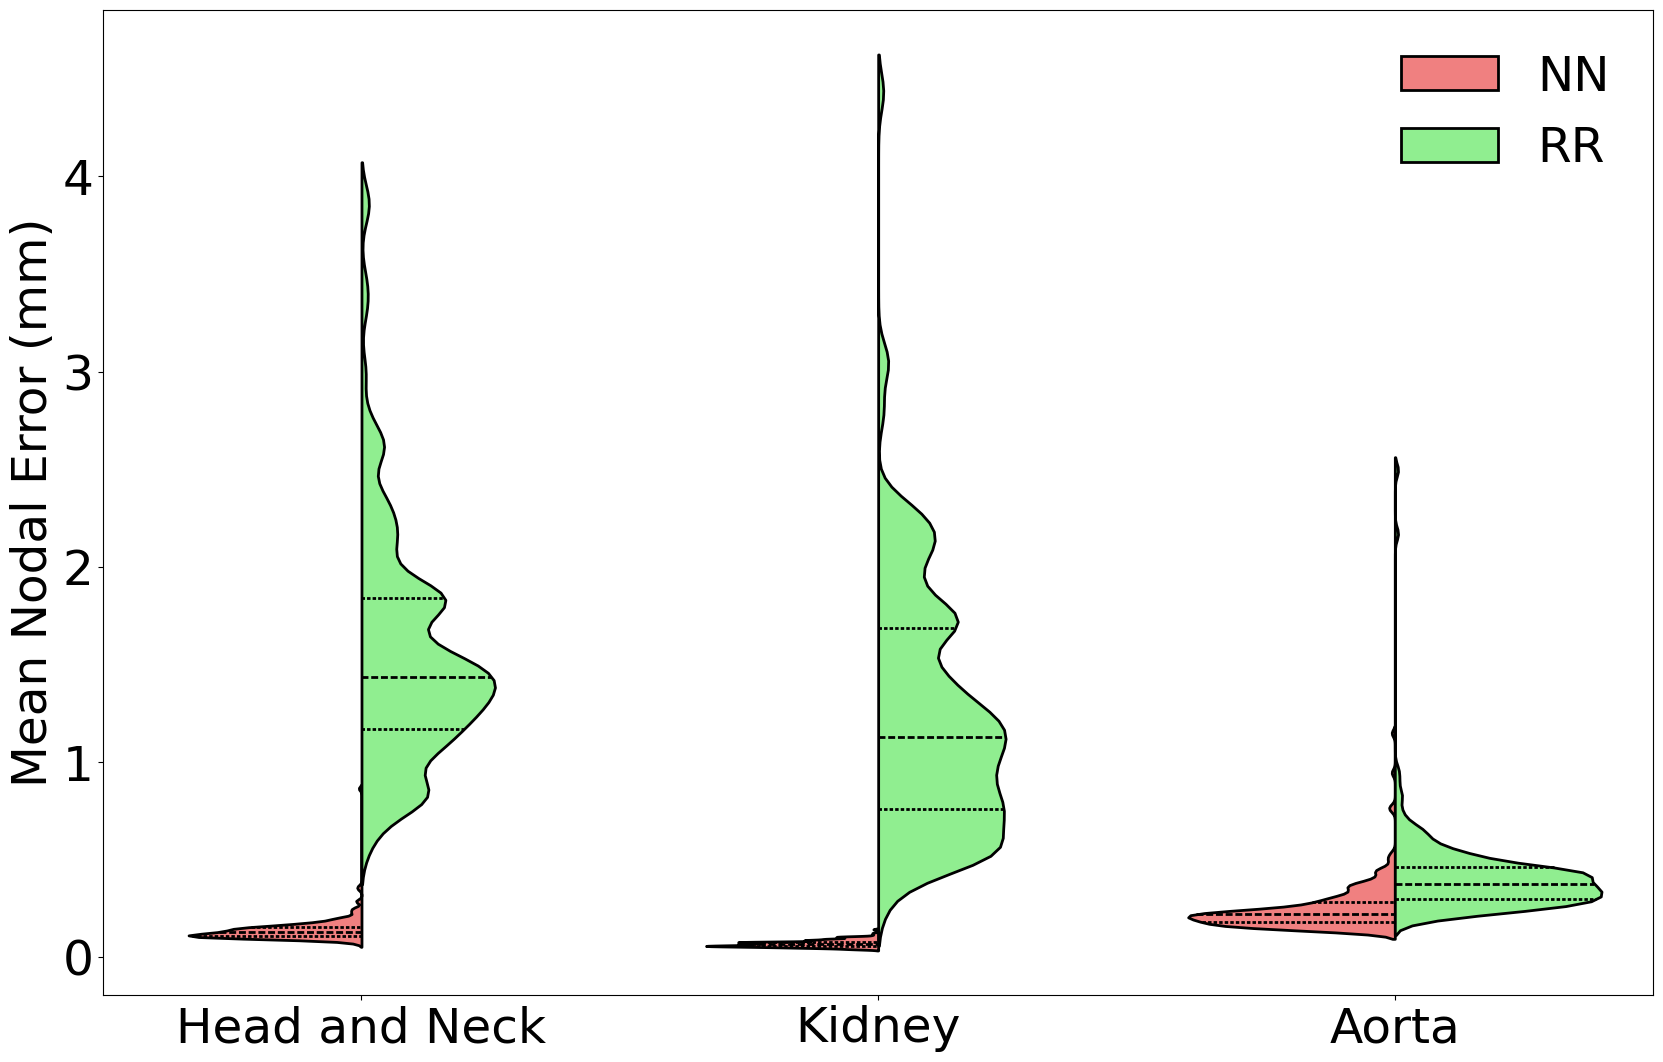

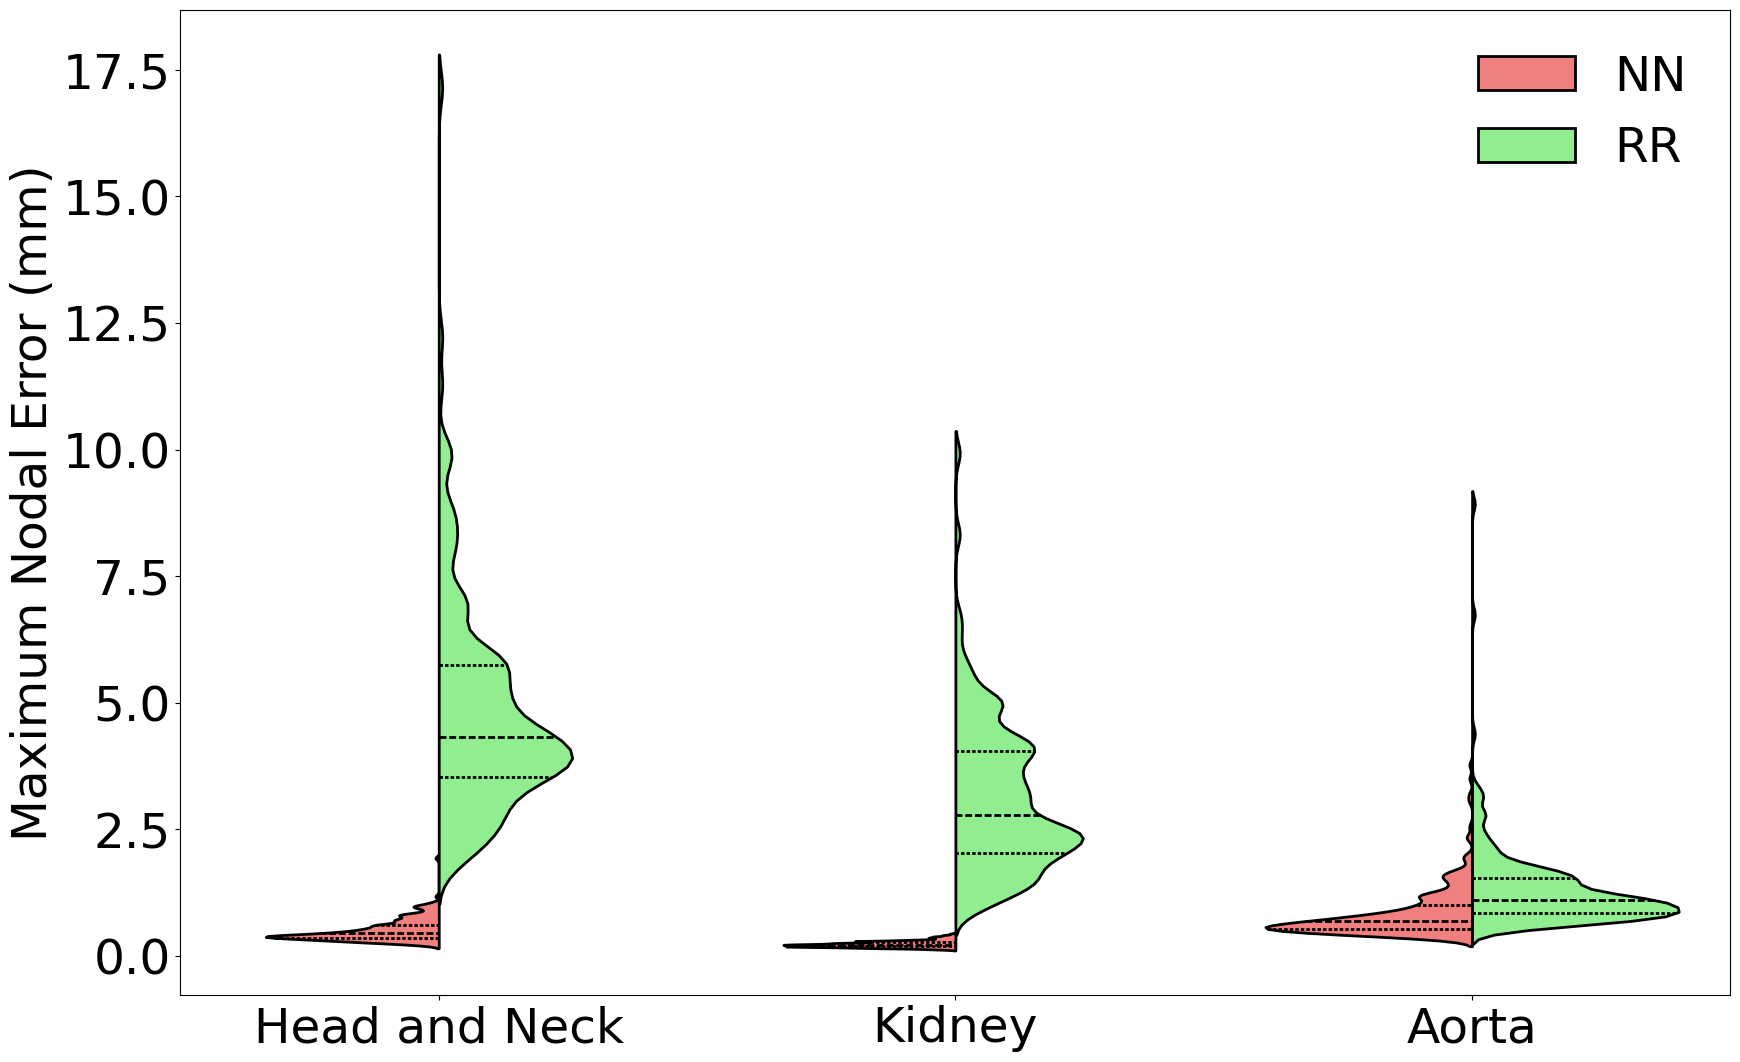

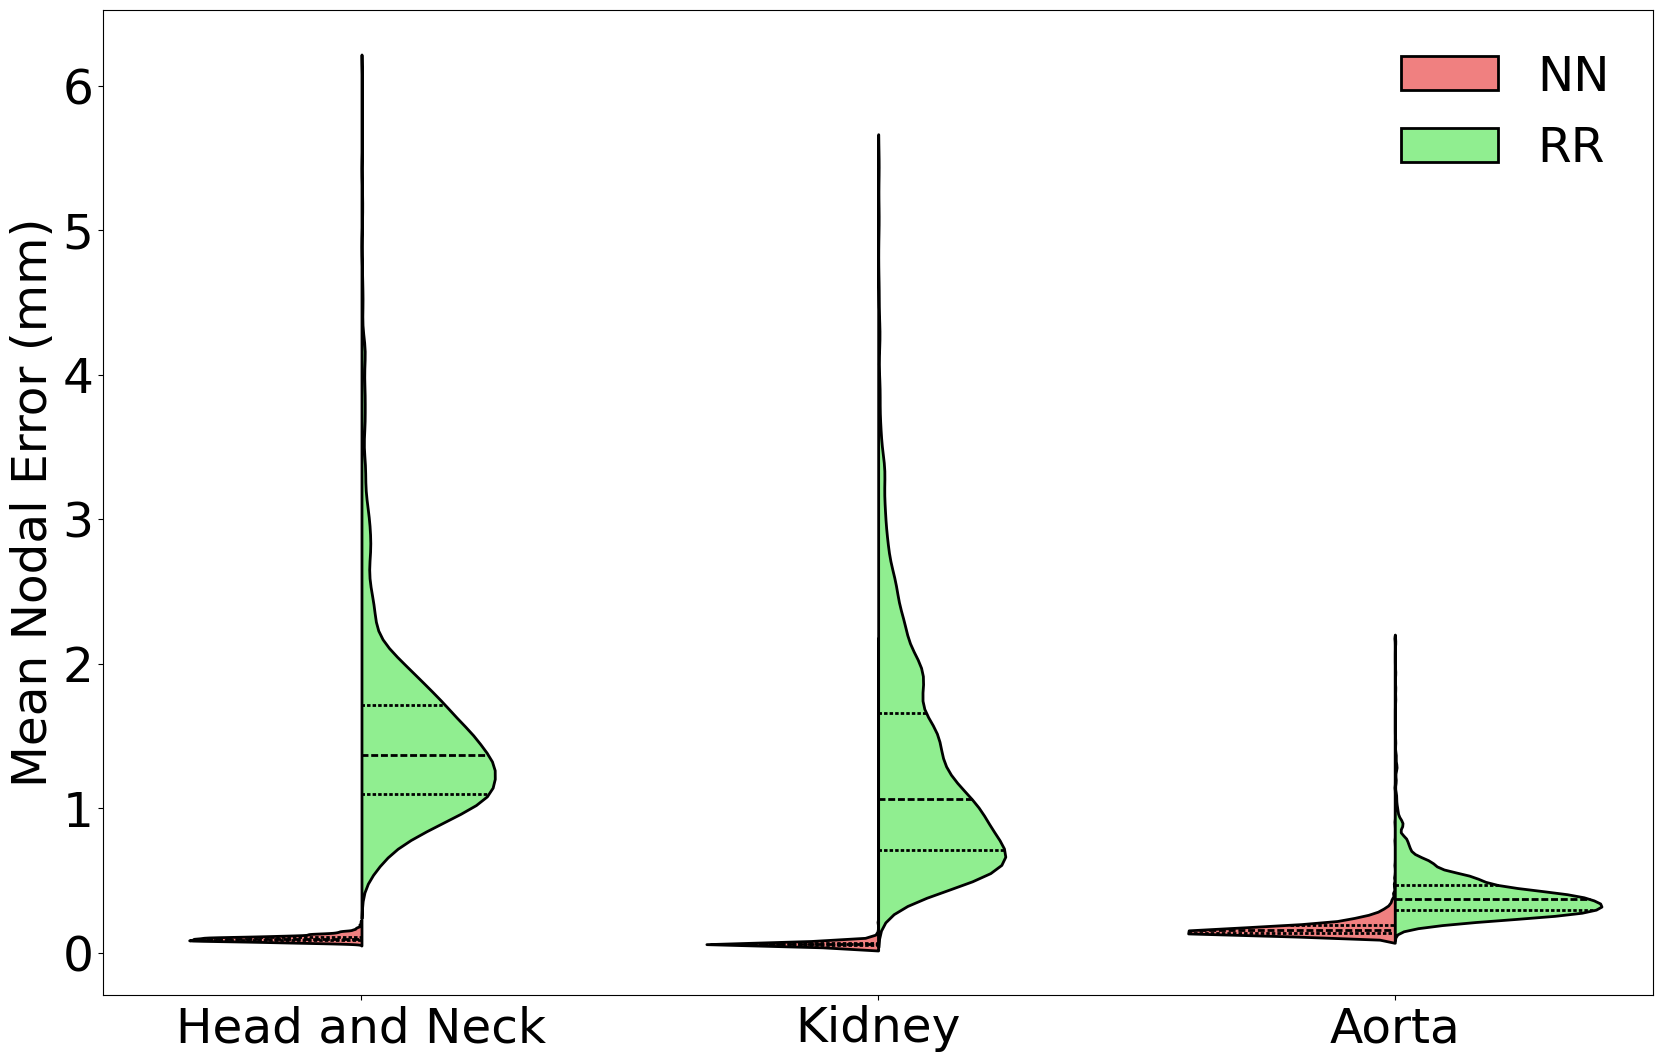

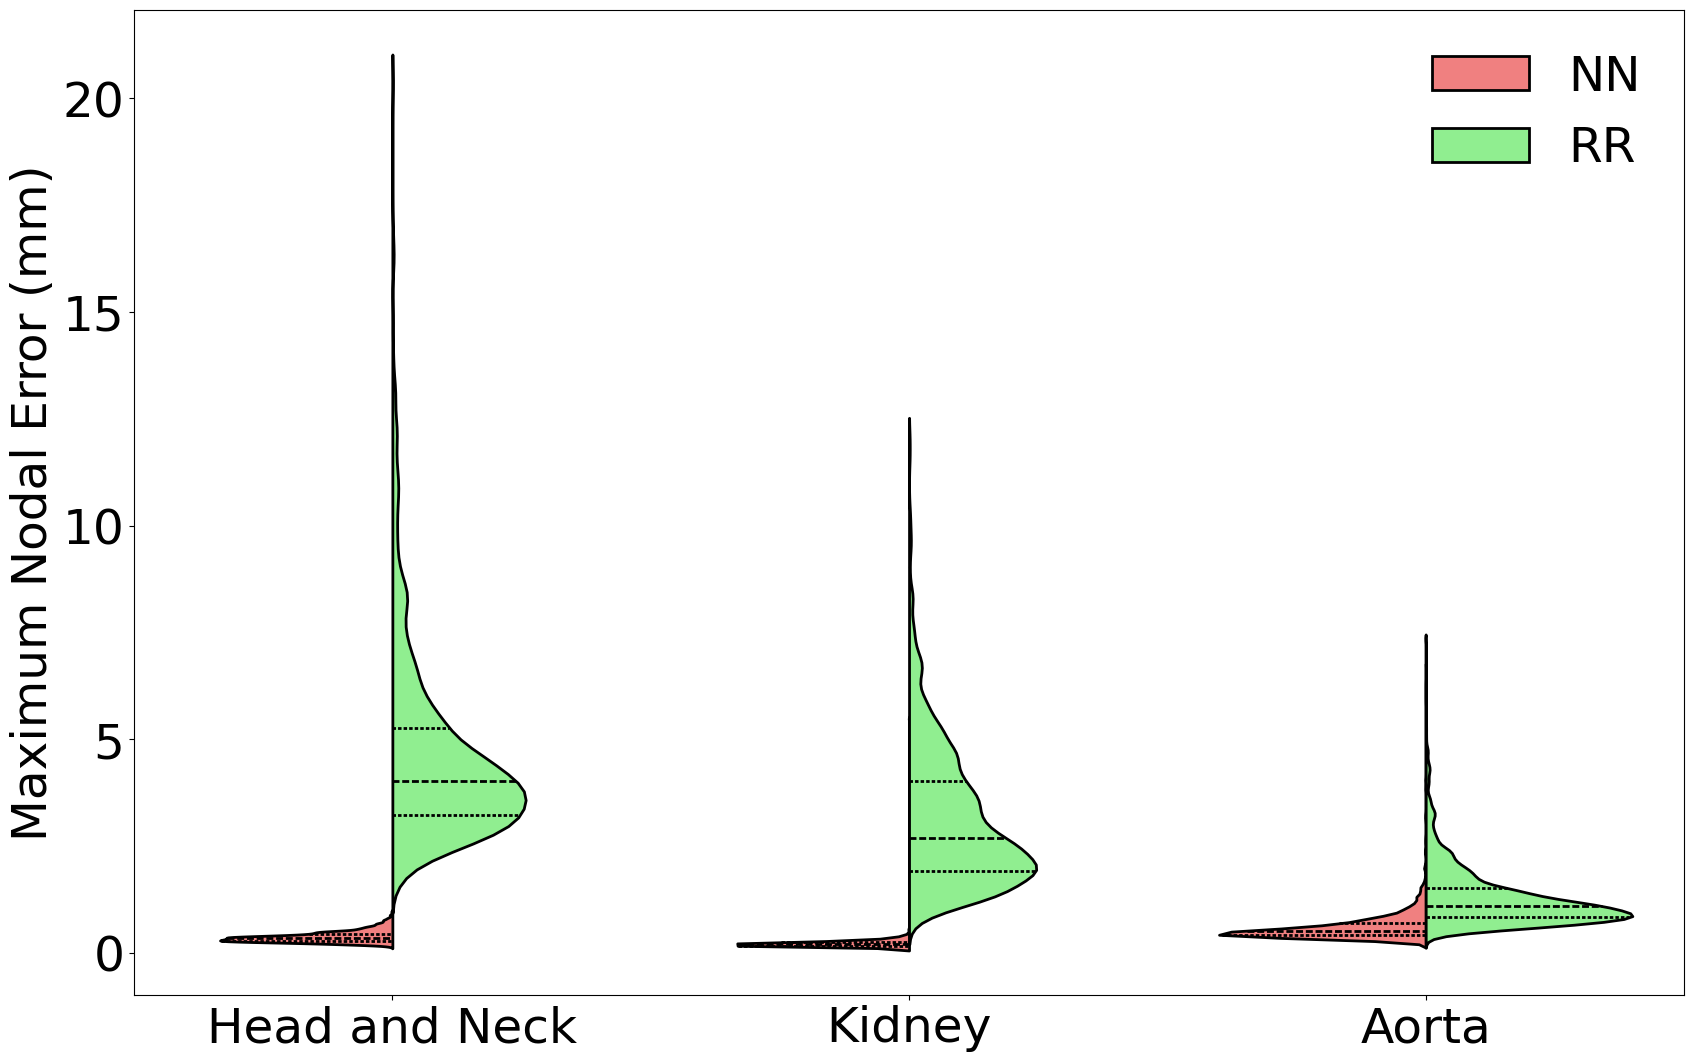

In [4]:
# All models - Mean & Max error. 
def compute_RR_nodal_error(data_mat):
    """_summary_

    Args:
        data_mat (_type_): _description_
    """
    
    alpha = data_mat['RR_alpha']
    RR_test_deformation_gt = data_mat['test_deformation_label']
    RR_test_deformation_pred = data_mat['test_deformation_reconstruct']
    RR_train_deformation_gt = data_mat['train_deformation_label']
    RR_train_deformation_pred = data_mat['train_deformation_reconstruct']

    ################################################################################

    RR_dist_nodal_matrix_test = np.zeros(shape=(int(RR_test_deformation_gt.shape[0]/3), RR_test_deformation_gt.shape[1]))
    RR_mean_error_list_test, RR_max_error_list_test = [], []

    for i in range(RR_test_deformation_pred.shape[1]):
        dist_vector_temp = (RR_test_deformation_pred[:,i].reshape(-1,3) - 
                            RR_test_deformation_gt[:,i].reshape(-1,1).reshape(-1,3))
        node_pair_distance = []

        for j in range(dist_vector_temp.shape[0]): # Number of nodes
            node_pair_distance.append(np.linalg.norm(dist_vector_temp[j,:]))
        
        mean_error_temp = np.sum(np.array(node_pair_distance).astype(float).reshape(-1,1)) / len(node_pair_distance)
        max_error_temp = np.max(node_pair_distance)
        RR_dist_nodal_matrix_test[:,i] = np.array(node_pair_distance).astype(float).reshape(1,-1) * 1e3 # Unit: mm. 
        RR_mean_error_list_test.append(mean_error_temp)
        RR_max_error_list_test.append(max_error_temp)

    RR_mean_nodal_error_test = 1e3*np.array(RR_mean_error_list_test).astype(float).reshape(-1,1) # Unit: mm. 
    RR_max_nodal_error_test = 1e3*np.array(RR_max_error_list_test).astype(float).reshape(-1,1) # Unit: mm. 
    RR_mean_mean_test = np.mean(RR_mean_nodal_error_test) # Compute the mean value of mean errors - RR. 
    RR_max_mean_test = np.mean(RR_max_nodal_error_test) # Compute the mean value of max errors - RR. 

    ################################################################################

    RR_dist_nodal_matrix_train = np.zeros(shape=(int(RR_train_deformation_gt.shape[0]/3), RR_train_deformation_gt.shape[1]))
    RR_mean_error_list_train, RR_max_error_list_train = [], []

    for i in range(RR_train_deformation_pred.shape[1]):
        dist_vector_temp = (RR_train_deformation_pred[:,i].reshape(-1,3) - 
                            RR_train_deformation_gt[:,i].reshape(-1,1).reshape(-1,3))
        node_pair_distance = []

        for j in range(dist_vector_temp.shape[0]): # Number of nodes
            node_pair_distance.append(np.linalg.norm(dist_vector_temp[j,:]))
        
        mean_error_temp = np.sum(np.array(node_pair_distance).astype(float).reshape(-1,1)) / len(node_pair_distance)
        max_error_temp = np.max(node_pair_distance)
        RR_dist_nodal_matrix_train[:,i] = np.array(node_pair_distance).astype(float).reshape(1,-1) * 1e3 # Unit: mm.
        RR_mean_error_list_train.append(mean_error_temp)
        RR_max_error_list_train.append(max_error_temp)

    RR_mean_nodal_error_train = 1e3*np.array(RR_mean_error_list_train).astype(float).reshape(-1,1) # Unit: mm. 
    RR_max_nodal_error_train = 1e3*np.array(RR_max_error_list_train).astype(float).reshape(-1,1) # Unit: mm. 
    RR_mean_mean_train = np.mean(RR_mean_nodal_error_train) # Compute the mean value of mean errors. 
    RR_max_mean_train = np.mean(RR_max_nodal_error_train) # Compute the mean value of max errors.
    
    return RR_mean_nodal_error_test, RR_max_nodal_error_test, RR_mean_nodal_error_train, RR_max_nodal_error_train, alpha, \
        RR_mean_mean_test, RR_max_mean_test, RR_mean_mean_train, RR_max_mean_train, RR_dist_nodal_matrix_test, RR_dist_nodal_matrix_train
        

def set_dataframe(result_folder_dir, RR_MAT_filename, ANN_MAT_filename="ANN_benchmark_results.mat"):
    """_summary_

    Args:
        result_folder_name (_type_): _description_
        RR_MAT_filename (_type_): _description_
        ANN_MAT_filename (str, optional): _description_. Defaults to "ANN_benchmark_results.mat".
    """
    
    RR_data_mat = scipy.io.loadmat(os.path.join(result_folder_dir, RR_MAT_filename))
    RR_mean_nodal_error_test, RR_max_nodal_error_test, \
    RR_mean_nodal_error_train, RR_max_nodal_error_train, RR_alpha, \
    RR_mean_mean_test, RR_max_mean_test, RR_mean_mean_train, RR_max_mean_train, \
    _, _ = compute_RR_nodal_error(RR_data_mat)
    
    ANN_data_mat = scipy.io.loadmat(os.path.join(result_folder_dir, ANN_MAT_filename))

    ANN_mean_nodal_error_test = ANN_data_mat['mean_nodal_error'].astype(float).reshape(-1,1) # Unit: mm. 
    ANN_max_nodal_error_test = ANN_data_mat['max_nodal_error'].astype(float).reshape(-1,1) # Unit: mm. 
    ANN_string_arr_test_length = len(ANN_mean_nodal_error_test)
    RR_string_arr_test_length = len(RR_mean_nodal_error_test)

    ANN_mean_nodal_error_train = ANN_data_mat['mean_nodal_error_train'].astype(float).reshape(-1,1) # Unit: mm. 
    ANN_max_nodal_error_train = ANN_data_mat['max_nodal_error_train'].astype(float).reshape(-1,1) # Unit: mm. 
    ANN_string_arr_train_length = len(ANN_mean_nodal_error_train)
    RR_string_arr_train_length = len(RR_mean_nodal_error_train)

    # % Print tables
    # print('%.3f' %100.2222)
    print('----- Mean --- ' + result_folder_dir + ' -----')
    print('& %.3f & %.3f & %.3f & %.3f \\\\ \\hline' %(np.mean(ANN_mean_nodal_error_train), RR_mean_mean_train, np.mean(ANN_mean_nodal_error_test), RR_mean_mean_test))

    print('----- Max ---' + result_folder_dir + ' -----')
    print('& %.3f & %.3f & %.3f & %.3f \\\\ \\hline' %(np.mean(ANN_max_nodal_error_train), RR_max_mean_train, np.mean(ANN_max_nodal_error_test), RR_max_mean_test))


    data_mean_test = {'nodal': np.vstack((ANN_mean_nodal_error_test, RR_mean_nodal_error_test)).reshape(-1),
                     'model': np.vstack((np.array(['NN']*ANN_string_arr_test_length).astype(str).reshape(-1,1), 
                                         np.array(['RR']*RR_string_arr_test_length).astype(str).reshape(-1,1))).reshape(-1),
                     'geo': np.vstack((np.array([result_folder_dir]*ANN_string_arr_test_length).astype(str).reshape(-1,1), 
                                       np.array([result_folder_dir]*RR_string_arr_test_length).astype(str).reshape(-1,1))).reshape(-1)}
    
    data_max_test = {'nodal': np.vstack((ANN_max_nodal_error_test, RR_max_nodal_error_test)).reshape(-1),
                     'model': np.vstack((np.array(['NN']*ANN_string_arr_test_length).astype(str).reshape(-1,1), 
                                         np.array(['RR']*RR_string_arr_test_length).astype(str).reshape(-1,1))).reshape(-1),
                     'geo': np.vstack((np.array([result_folder_dir]*ANN_string_arr_test_length).astype(str).reshape(-1,1), 
                                       np.array([result_folder_dir]*RR_string_arr_test_length).astype(str).reshape(-1,1))).reshape(-1)}
    
    data_mean_train = {'nodal': np.vstack((ANN_mean_nodal_error_train, RR_mean_nodal_error_train)).reshape(-1),
                       'model': np.vstack((np.array(['NN']*ANN_string_arr_train_length).astype(str).reshape(-1,1), 
                                           np.array(['RR']*RR_string_arr_train_length).astype(str).reshape(-1,1))).reshape(-1),
                       'geo': np.vstack((np.array([result_folder_dir]*ANN_string_arr_train_length).astype(str).reshape(-1,1), 
                                         np.array([result_folder_dir]*RR_string_arr_train_length).astype(str).reshape(-1,1))).reshape(-1)}
    
    data_max_train = {'nodal': np.vstack((ANN_max_nodal_error_train, RR_max_nodal_error_train)).reshape(-1),
                      'model': np.vstack((np.array(['NN']*ANN_string_arr_train_length).astype(str).reshape(-1,1), 
                                          np.array(['RR']*RR_string_arr_train_length).astype(str).reshape(-1,1))).reshape(-1),
                      'geo': np.vstack((np.array([result_folder_dir]*ANN_string_arr_train_length).astype(str).reshape(-1,1), 
                                        np.array([result_folder_dir]*RR_string_arr_train_length).astype(str).reshape(-1,1))).reshape(-1)}
    
    return data_mean_test, data_max_test, data_mean_train, data_max_train, RR_alpha


result_folder_dir_list = ['results/head_and_neck', 'results/kidney', 'results/aorta']
RR_result_MAT_filename_list = ["HN_RR.mat", 
                               "kidney_RR.mat", 
                               "aorta_RR.mat"]
ANN_result_MAT_filename_list = ["HN_FM_5_LAT_12.mat",
                                "kidney_FM_5_LAT_8.mat",
                                "aorta_FM_10_LAT_20.mat"]

for ind, item in enumerate(result_folder_dir_list):
    data_mean_test, data_max_test, \
    data_mean_train, data_max_train, RR_alpha = set_dataframe(item, RR_MAT_filename=RR_result_MAT_filename_list[ind], 
                                                              ANN_MAT_filename=ANN_result_MAT_filename_list[ind])
    
    if ind == 0: 
        df_mean_all_test = pd.DataFrame(data=data_mean_test)
        df_max_all_test = pd.DataFrame(data=data_max_test)
        df_mean_all_train = pd.DataFrame(data=data_mean_train)
        df_max_all_train = pd.DataFrame(data=data_max_train)
    else:
        df_mean_all_test = pd.concat([df_mean_all_test, pd.DataFrame(data=data_mean_test)], axis=0)
        df_max_all_test = pd.concat([df_max_all_test, pd.DataFrame(data=data_max_test)], axis=0)
        df_mean_all_train = pd.concat([df_mean_all_train, pd.DataFrame(data=data_mean_train)], axis=0)
        df_max_all_train = pd.concat([df_max_all_train, pd.DataFrame(data=data_max_train)], axis=0)
    
    
fig, axes = plt.subplots(1,1,figsize = (20, 12.8))
plt.rcParams.update({"font.size": 35})
plt.tick_params(labelsize=35)
ax = seaborn.violinplot(data=df_mean_all_test, x='geo', y='nodal', hue='model', saturation = 1, palette = ['lightcoral','lightgreen'] , inner = 'quart', linewidth = 2, linecolor = 'black', split=True, bw=violin_bw, scale="count")
ax.set_xticklabels(['Head and Neck', 'Kidney', 'Aorta'])
ax.legend(title = '')
plt.ylabel('Mean Nodal Error (mm)', fontsize=35)
plt.xlabel('')
plt.legend(frameon=False)
plt.savefig(figure_folder_path + '/violin_mean_test.png', dpi = 300)


fig, axes = plt.subplots(1,1,figsize = (20, 12.8))
plt.rcParams.update({"font.size": 35})
plt.tick_params(labelsize=35)
ax = seaborn.violinplot(data=df_max_all_test, x='geo', y='nodal', hue='model', saturation = 1, palette = ['lightcoral','lightgreen'] , inner = 'quart', linewidth = 2, linecolor = 'black', split=True, bw=violin_bw, scale="count")
ax.set_xticklabels(['Head and Neck', 'Kidney', 'Aorta'])
ax.legend(title = '')
plt.ylabel('Maximum Nodal Error (mm)', fontsize=35)
plt.xlabel('')
plt.legend(frameon=False)
plt.savefig(figure_folder_path + '/violin_max_test.png', dpi = 300)


fig, axes = plt.subplots(1,1,figsize = (20, 12.8))
plt.rcParams.update({"font.size": 35})
plt.tick_params(labelsize=35)
ax = seaborn.violinplot(data=df_mean_all_train, x='geo', y='nodal', hue='model', saturation = 1, palette = ['lightcoral','lightgreen'] , inner = 'quart', linewidth = 2, linecolor = 'black', split=True, bw=violin_bw, scale="count")
ax.set_xticklabels(['Head and Neck', 'Kidney', 'Aorta'])
ax.legend(title = '')
plt.ylabel('Mean Nodal Error (mm)', fontsize=35)
plt.xlabel('')
plt.legend(frameon=False)
plt.savefig(figure_folder_path + '/violin_mean_train.png', dpi = 300)


fig, axes = plt.subplots(1,1,figsize = (20, 12.8))
plt.rcParams.update({"font.size": 35})
plt.tick_params(labelsize=35)
ax = seaborn.violinplot(data=df_max_all_train, x='geo', y='nodal', hue='model', saturation = 1, palette = ['lightcoral','lightgreen'] , inner = 'quart', linewidth = 2, linecolor = 'black', split=True, bw=violin_bw, scale="count")
ax.set_xticklabels(['Head and Neck', 'Kidney', 'Aorta'])
ax.legend(title = '')
plt.ylabel('Maximum Nodal Error (mm)', fontsize=35)
plt.xlabel('')
plt.legend(frameon=False)
plt.savefig(figure_folder_path + '/violin_max_train.png', dpi = 300)